# 02_01 Frequency analysis for class variables

## Import the preprocess dataset without expired recordes

In [1]:
%matplotlib inline 
import pandas as pd
path=r'noExpired.xlsx'
df=pd.read_excel(path)

## List of features and their description in the initial dataset 

In [2]:
# iterate output the miss percer for numberic cols

#headList=(df.columns.values)
#g=df.columns.to_series().groupby(df.dtypes).groups

from __future__ import division

missStatis=[]

for colName in df.columns.values:
    if df[colName].dtypes==object:
        typeCol='Categorical'
    else:
        typeCol='Numerical '
        
    if colName!='race':
        tmp=df[colName]
        numMiss=tmp.shape[0]-tmp.dropna().shape[0]
    else:
        tmp=df['race']
        numMiss=len(tmp[tmp=="?"])
    percentMiss=numMiss/df.shape[0]*100
    #print "%s missing %10.2f" %(colName,percentMiss)
    
    missStatis.append((colName,typeCol,format(percentMiss,'.2f')))
    
    
missDF=pd.DataFrame(missStatis,columns=['Header','Type','Missing %'])
missDF

,Header,Type,Missing %
0,race,Categorical,2.21
1,gender,Categorical,0.00
2,age,Categorical,0.00
3,admission_type_id,Categorical,7.22
4,discharge_disposition_id,Categorical,4.78
5,admission_source_id,Categorical,9.26
6,time_in_hospital,Numerical,0.00
7,medical_specialty,Categorical,0.00
8,num_lab_procedures,Numerical,0.00
9,num_procedures,Numerical,0.00


## Display  the realtionship between race and age

In [6]:
print pd.crosstab(df['race'],df['age'],rownames=['race'])
pd.crosstab(df['race'],df['age'],rownames=['race'])

age              [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  [60-70)  \
race                                                                            
?                     0        0        5       11       23       45       47   
AfricanAmerican       3       28       46      140      298      442      458   
Asian                 0        0        1        4        6       11        9   
Caucasian            25       50       87      241      598     1147     1554   
Hispanic              1        2        3       15       31       36       38   
Other                 2        2        0        5       12       24       41   

age              [70-80)  [80-90)  [90-100)  
race                                         
?                     53       27         6  
AfricanAmerican      407      158        45  
Asian                 11       10         1  
Caucasian           2003     1308       198  
Hispanic              40       10         2  
Other                 23     

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
race,,,,,,,,,,
?,0,0,5,11,23,45,47,53,27,6
AfricanAmerican,3,28,46,140,298,442,458,407,158,45
Asian,0,0,1,4,6,11,9,11,10,1
Caucasian,25,50,87,241,598,1147,1554,2003,1308,198
Hispanic,1,2,3,15,31,36,38,40,10,2
Other,2,2,0,5,12,24,41,23,12,0


In [4]:
byRaceAge=df.groupby(['race','age'])
byRaceAge['time_in_hospital'].mean().unstack()

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
race,,,,,,,,,,
?,NaN,NaN,2.400000,4.272727,3.000000,3.266667,4.468085,3.830189,5.925926,4.333333
AfricanAmerican,5.00,3.00,3.804348,3.735714,4.040268,4.266968,4.890830,5.002457,4.854430,5.355556
Asian,NaN,NaN,5.000000,3.500000,3.500000,3.272727,4.111111,3.090909,4.000000,1.000000
Caucasian,2.88,2.58,3.000000,3.896266,3.757525,4.156059,4.344273,4.635547,4.957187,4.707071
Hispanic,3.00,2.50,2.000000,3.400000,3.935484,3.444444,4.684211,4.400000,4.500000,8.000000
Other,2.50,3.00,NaN,3.400000,3.583333,3.708333,4.048780,5.304348,5.083333,NaN


##   race, age,  admission_type_id, admission_source_id vs readmitted

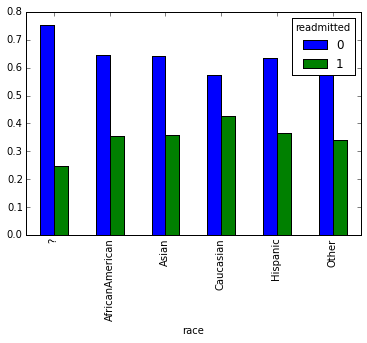

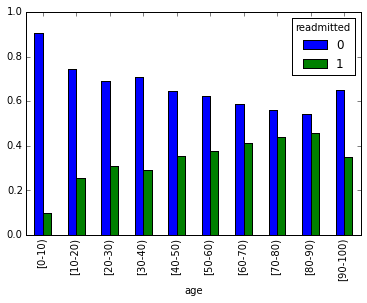

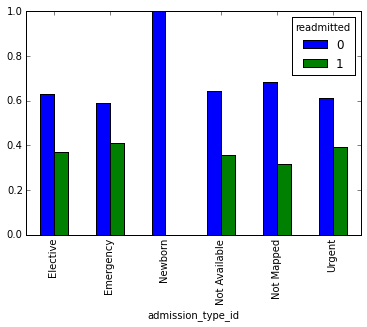

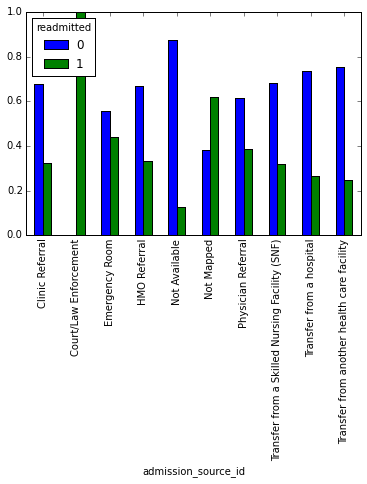

In [5]:
raceCorelation = pd.crosstab(df['race'],df['readmitted'],rownames=['race']).apply(lambda r: r/r.sum(), axis=1)
#raceCorelation
raceCorelation.plot(kind='bar')

"""
medspcialCorelation = pd.crosstab(df['medical_specialty'],df['readmitted'],rownames=['medical_specialty']).apply(lambda r: r/r.sum(), axis=1)
#raceCorelation
medspcialCorelation.plot(kind='bar',figsize=(18,18))
"""

ageCorelation = pd.crosstab(df['age'],df['readmitted'],rownames=['age']).apply(lambda r: r/r.sum(), axis=1)
#raceCorelation
ageCorelation.plot(kind='bar')

emergencyCorelation = pd.crosstab(df['admission_type_id'],df['readmitted'],rownames=['admission_type_id']).apply(lambda r: r/r.sum(), axis=1)
#raceCorelation
emergencyCorelation.plot(kind='bar')

admittypeCorelation = pd.crosstab(df['admission_source_id'],df['readmitted'],rownames=['admission_source_id']).apply(lambda r: r/r.sum(), axis=1)
#raceCorelation
admittypeCorelation.plot(kind='bar')